In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
# Print the number of null values in each column
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
# Print total number of duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

24

In [5]:
# Example of data cleaning
# Remove duplicate rows and assign the result back to df
df = df.drop_duplicates()
print("\nDuplicate rows removed.")
print("Number of duplicate rows after removal:", df.duplicated().sum())


Duplicate rows removed.
Number of duplicate rows after removal: 0


In [6]:
# Example of data cleaning
# Identify columns with <= 1 unique value, likely containing irrelevant or constant data
irrelevant_columns = [col for col in df.columns if df[col].nunique() <= 1]
print("\nColumns with <= 1 unique value, likely containing irrelevant or constant data:")
print(irrelevant_columns)


Columns with <= 1 unique value, likely containing irrelevant or constant data:
[]


In [7]:
# Example of handling missing values
# Count missing values in each column of df, then sort in descending order
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values in each column after removal of duplicates:")
print(missing_values)


Missing values in each column after removal of duplicates:
Precip Type                 517
Formatted Date                0
Summary                       0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [8]:
# Impute missing numerical values with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Impute missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [9]:
# Example of outlier detection
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))

# Set threshold for outlier detection
outlier_threshold = 3

# Find outliers
outliers = np.where(z_scores > outlier_threshold)

print("Outliers count:", len(outliers[0]))

Outliers count: 2603


In [9]:
# Example of feature engineering for the "Temperature (C)" column
# Calculate rolling mean temperature for a specific window size (e.g., 3 hours)
df['Rolling Mean Temperature'] = df['Temperature (C)'].rolling(window=3).mean()

# Replace zero or negative values with a small positive value (e.g., 0.1)
df['Temperature (C)'] = df['Temperature (C)'].apply(lambda x: x if x > 0 else 0.1)

# Apply logarithmic transformation to the temperature
df['Log Temperature'] = np.log1p(df['Temperature (C)'])

# Square the temperature
df['Temperature Squared'] = df['Temperature (C)'] ** 2

# Display the updated DataFrame
print("DataFrame after feature engineering:")
df.head()

DataFrame after feature engineering:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Rolling Mean Temperature,Log Temperature,Temperature Squared
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,NaN,2.348726,89.722994
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,NaN,2.337523,87.526420
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,9.401852,2.339667,87.942716
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,9.007407,2.228819,68.705679
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,8.807407,2.277837,76.659753


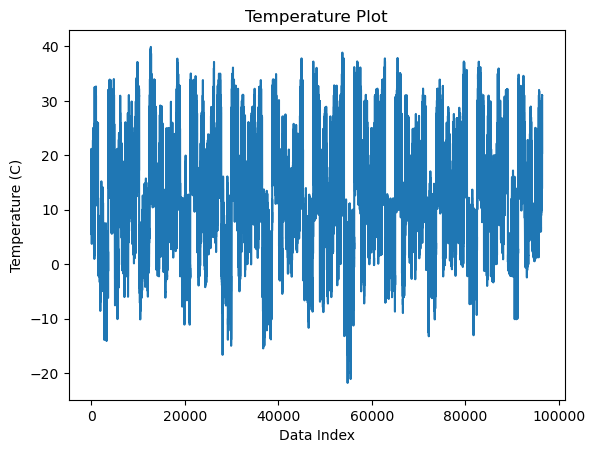

In [10]:
temperature_data = df['Temperature (C)']

fig = plt.figure()
plt.plot(temperature_data, '-')
plt.xlabel('Data Index')
plt.ylabel('Temperature (C)')
plt.title('Temperature Plot')
plt.show()

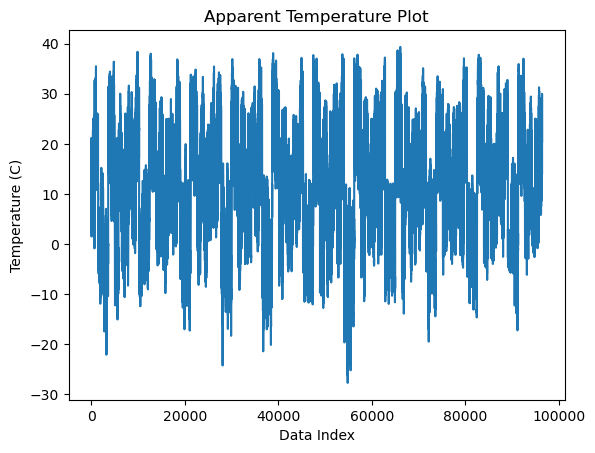

In [11]:
temperature_data = df['Apparent Temperature (C)']

fig = plt.figure()
plt.plot(temperature_data, '-')
plt.xlabel('Data Index')
plt.ylabel('Temperature (C)')
plt.title('Apparent Temperature Plot')
plt.show()

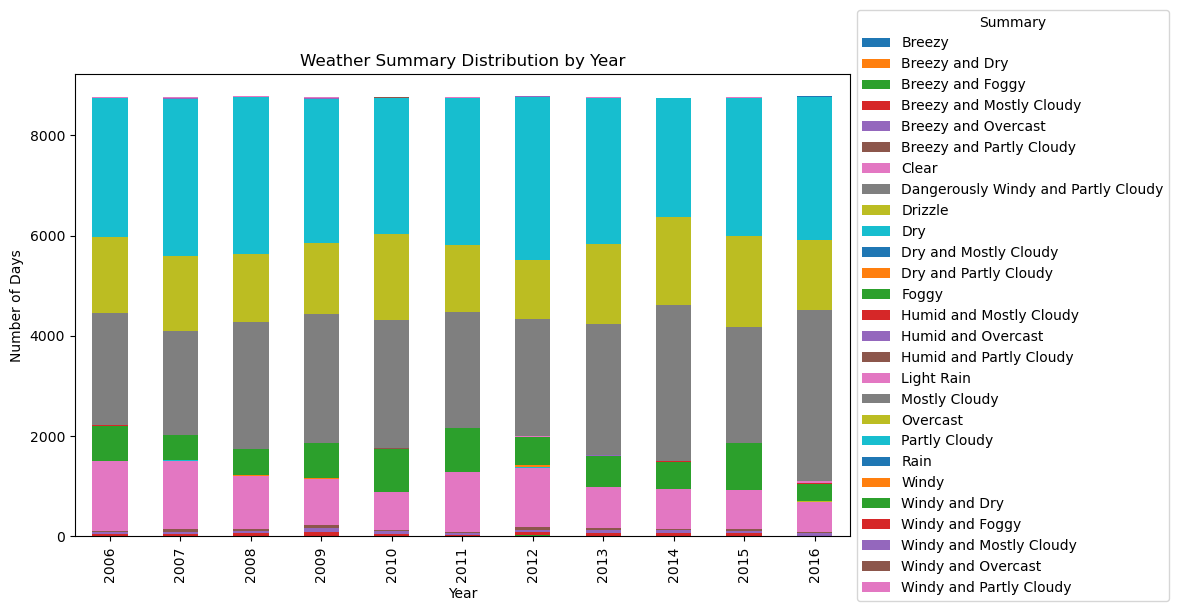

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'formatted_date' column to datetime type with utc=True
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Filter out data from 2006
df = df[df['Formatted Date'].dt.year >= 2006]

# Extract year from the 'formatted_date' column
df['Year'] = df['Formatted Date'].dt.year

# Grouping data by Year and Summary, and counting occurrences
summary_counts = df.groupby(['Year', 'Summary']).size().unstack(fill_value=0)

# Plotting
ax = summary_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.title('Weather Summary Distribution by Year')

# Placing legend on the right side of the graph
plt.legend(title='Summary', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

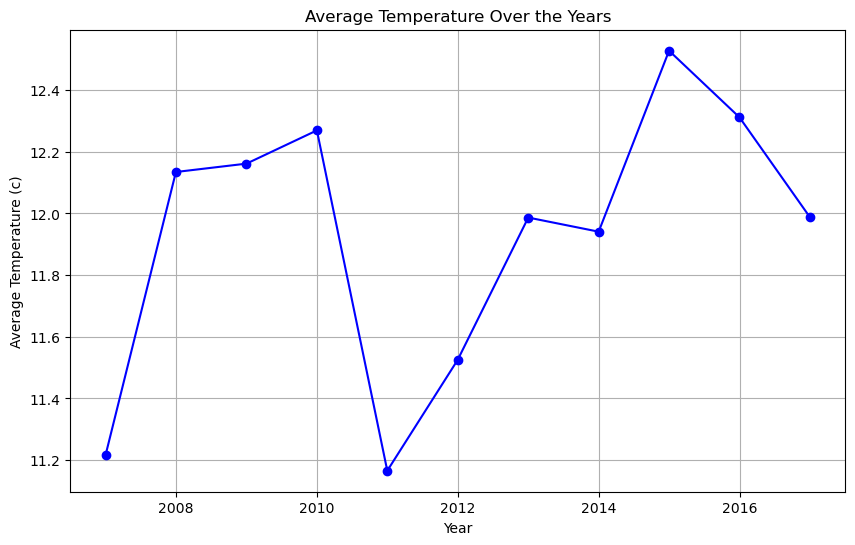

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'formatted_date' is the datetime column and 'wind_speed_(km/h)' is the wind speed column
# Convert 'formatted_date' column to datetime type
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# Group data into 5-day intervals and calculate the mean wind speed for each interval
grouped = df.groupby(pd.Grouper(key='Formatted Date', freq='1Y'))['Temperature (C)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, color='blue', marker='o', linestyle='-')
plt.title('Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (c)')
plt.grid(True)
plt.show()

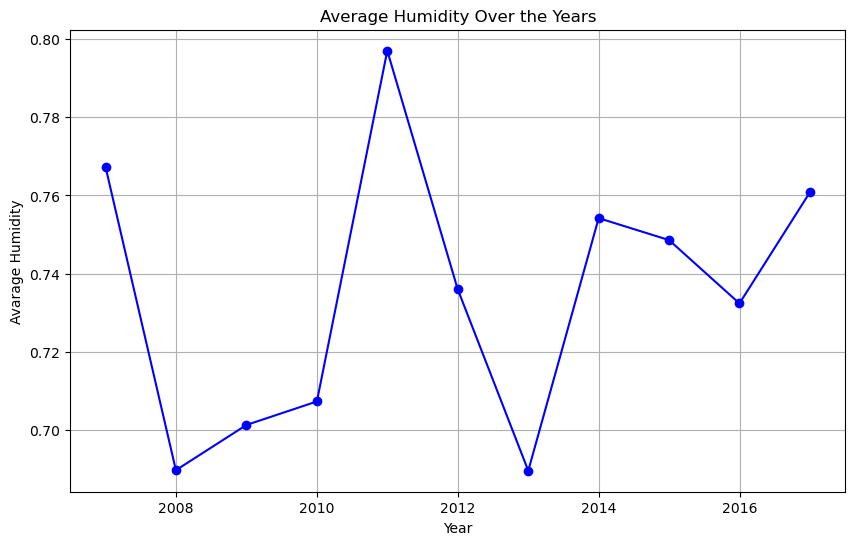

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'formatted_date' is the datetime column and 'wind_speed_(km/h)' is the wind speed column
# Convert 'formatted_date' column to datetime type
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# Group data into 5-day intervals and calculate the mean wind speed for each interval
grouped = df.groupby(pd.Grouper(key='Formatted Date', freq='1Y'))['Humidity'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, color='blue', marker='o', linestyle='-')
plt.title('Average Humidity Over the Years')
plt.xlabel('Year')
plt.ylabel('Avarage Humidity')
plt.grid(True)
plt.show()

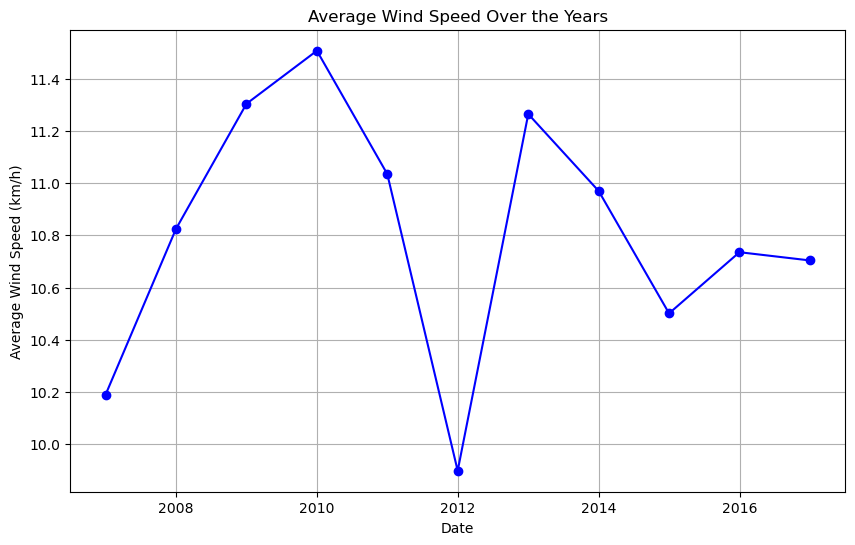

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'formatted_date' is the datetime column and 'wind_speed_(km/h)' is the wind speed column
# Convert 'formatted_date' column to datetime type
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# Group data into 5-day intervals and calculate the mean wind speed for each interval
grouped = df.groupby(pd.Grouper(key='Formatted Date', freq='1Y'))['Wind Speed (km/h)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, color='blue', marker='o', linestyle='-')
plt.title('Average Wind Speed Over the Years')
plt.xlabel('Date')
plt.ylabel('Average Wind Speed (km/h)')
plt.grid(True)
plt.show()

In [15]:
# Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year
count,96428.000000,96428.000000,96428.000000,96428.000000,96428.000000,96428.000000,96428.000000,96428.000000
mean,11.929809,10.851862,0.734900,10.812395,187.497999,10.347229,1003.232776,2011.000601
std,9.550471,10.695691,0.195466,6.913351,107.376870,4.192570,116.984898,3.162471
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000,2008.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.445000,2011.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,2014.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,2016.000000


In [16]:
# Correlation analysis for numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992626,-0.632328,0.009323,0.029883,0.392940,-0.005479
Apparent Temperature (C),0.992626,1.000000,-0.602638,-0.056312,0.028920,0.381806,-0.000249
Humidity,-0.632328,-0.602638,1.000000,-0.225089,0.000693,-0.369283,0.005455
Wind Speed (km/h),0.009323,-0.056312,-0.225089,1.000000,0.103944,0.100797,-0.049245
Wind Bearing (degrees),0.029883,0.028920,0.000693,0.103944,1.000000,0.047582,-0.011664
Visibility (km),0.392940,0.381806,-0.369283,0.100797,0.047582,1.000000,0.059817
Pressure (millibars),-0.005479,-0.000249,0.005455,-0.049245,-0.011664,0.059817,1.000000


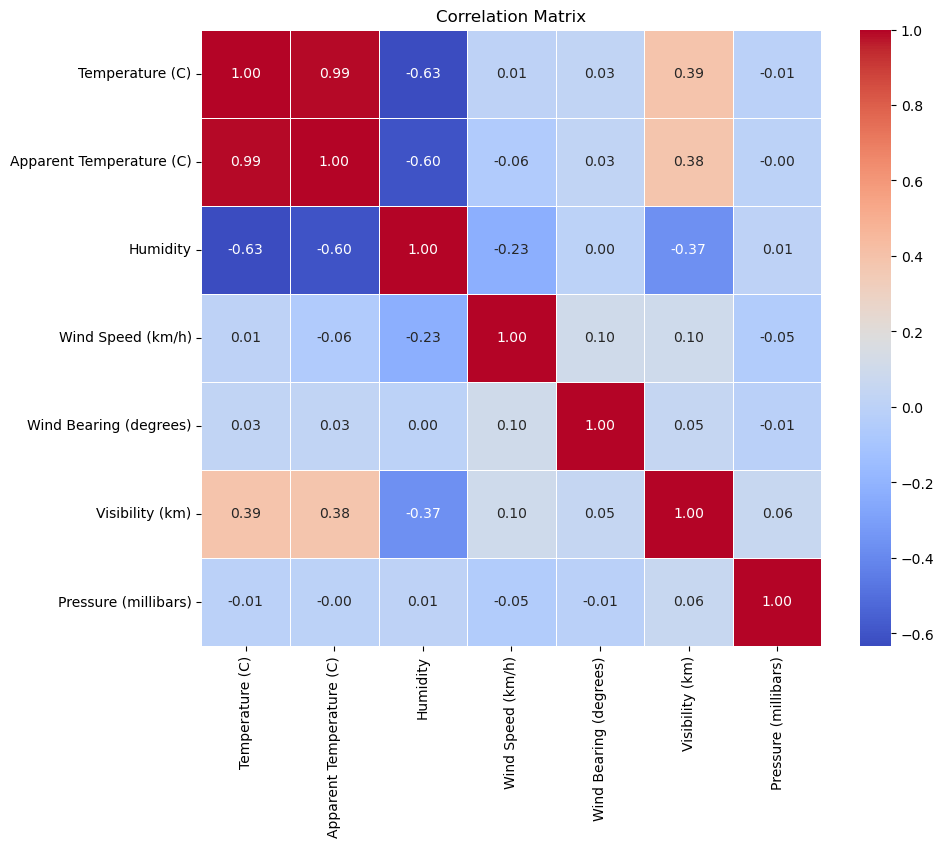

In [17]:
# Visualization of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

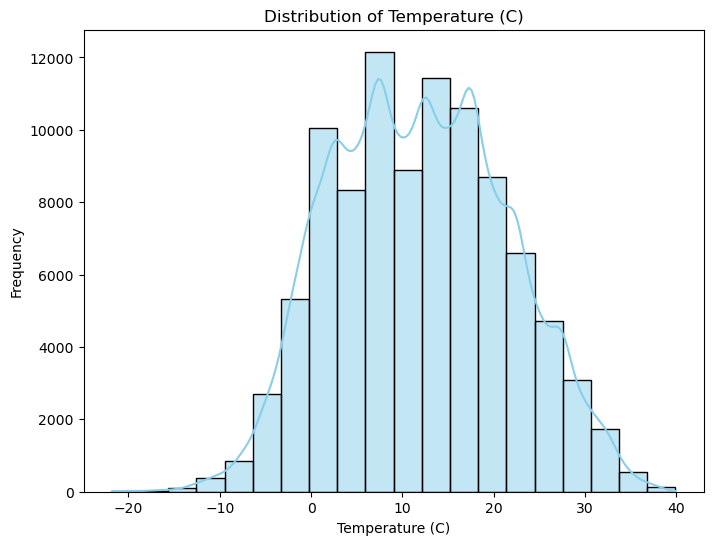

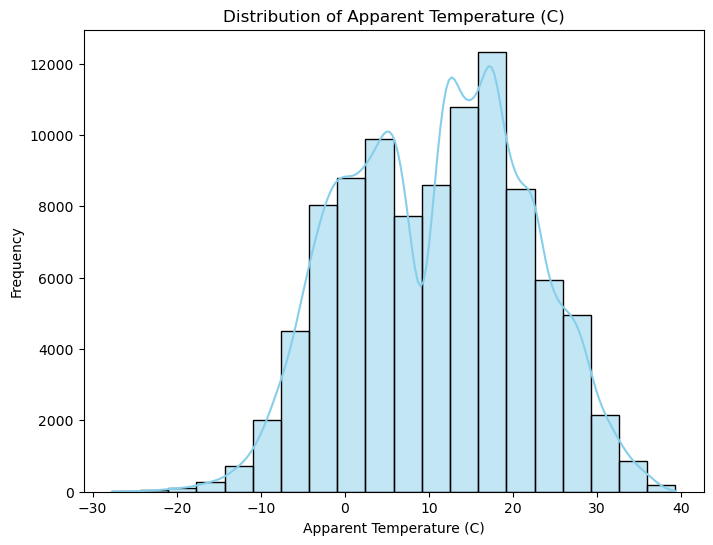

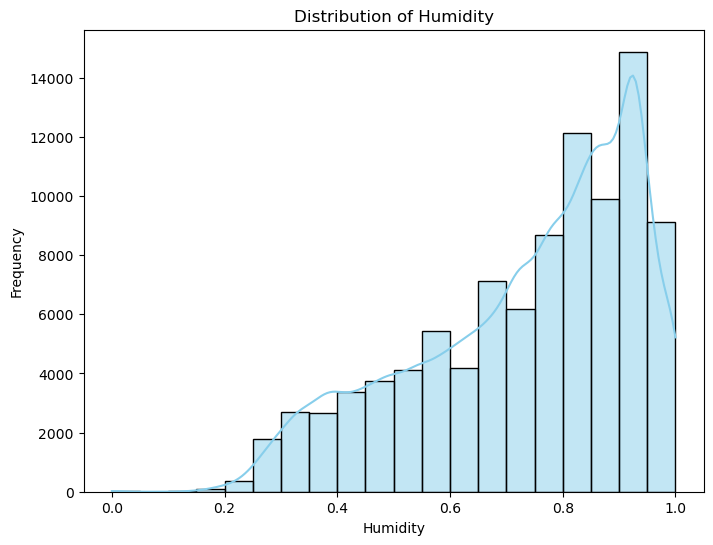

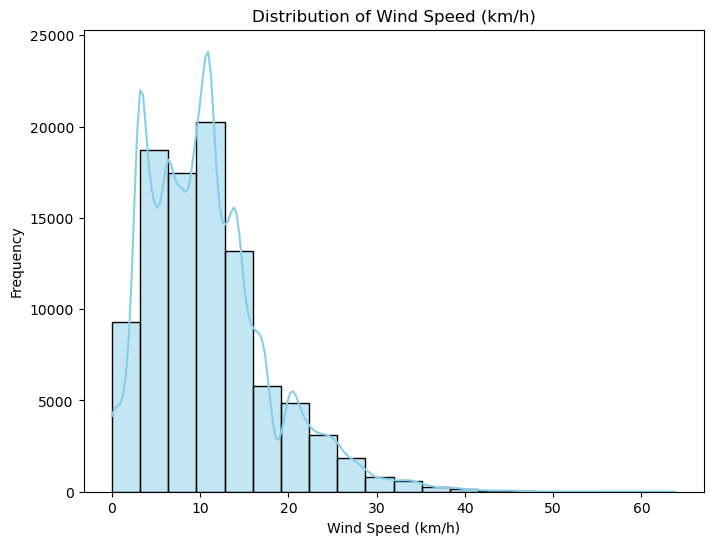

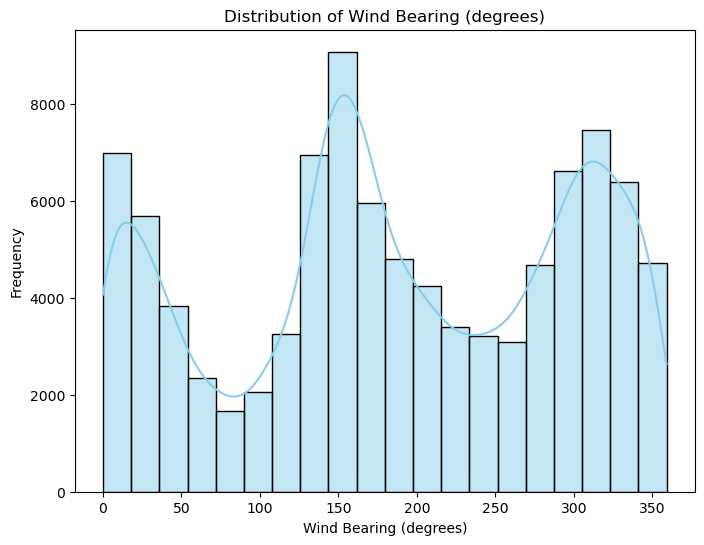

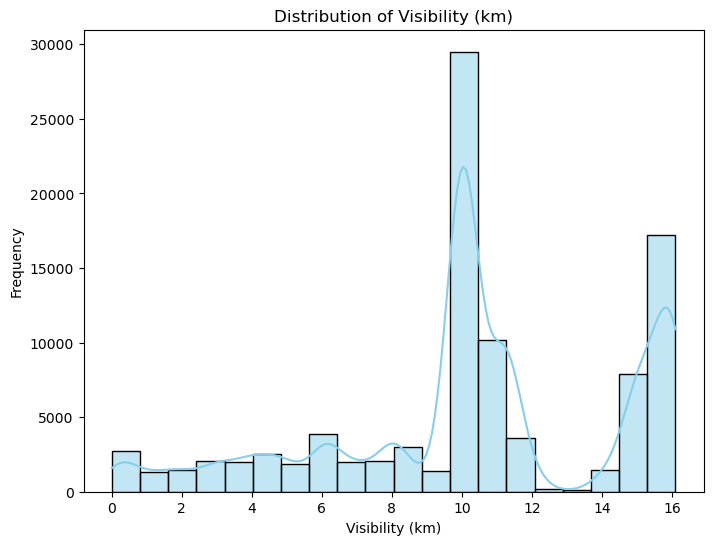

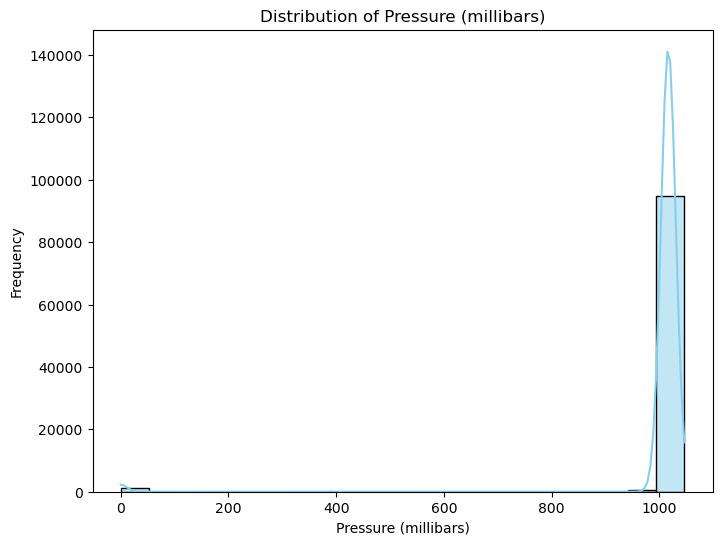

In [18]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

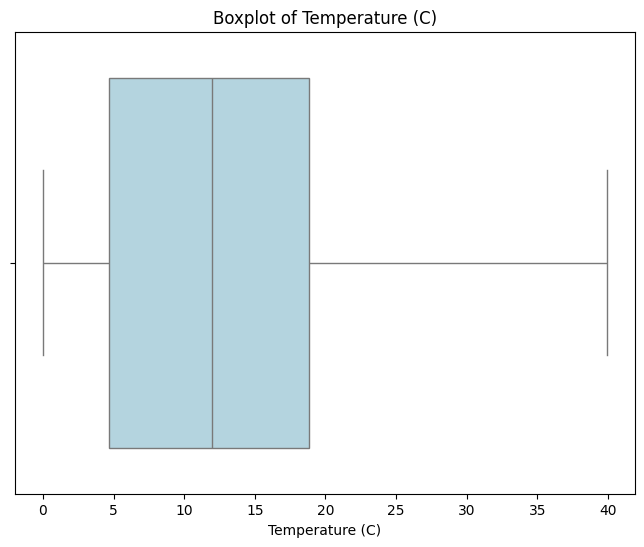

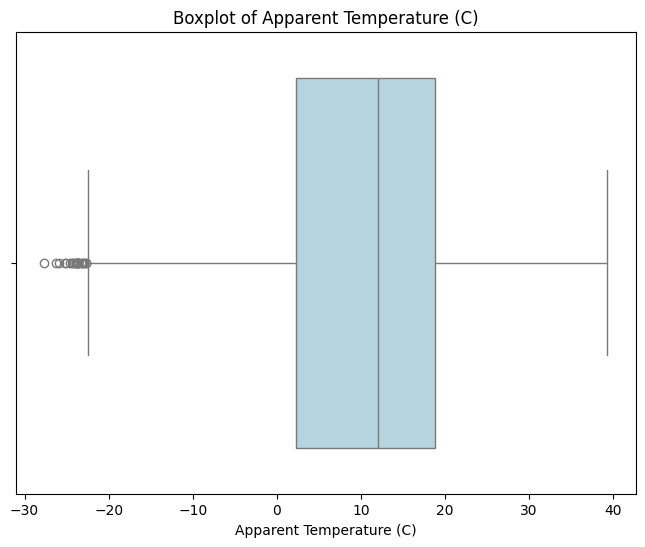

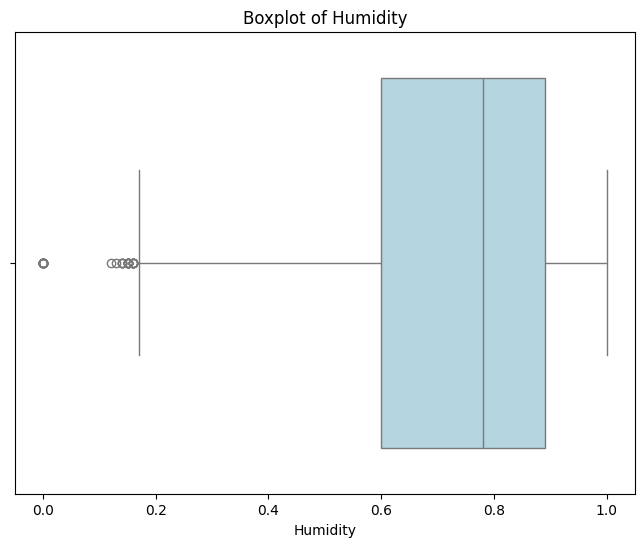

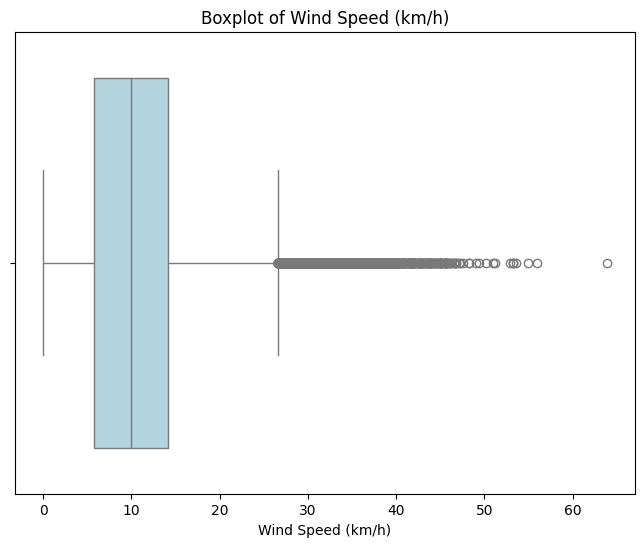

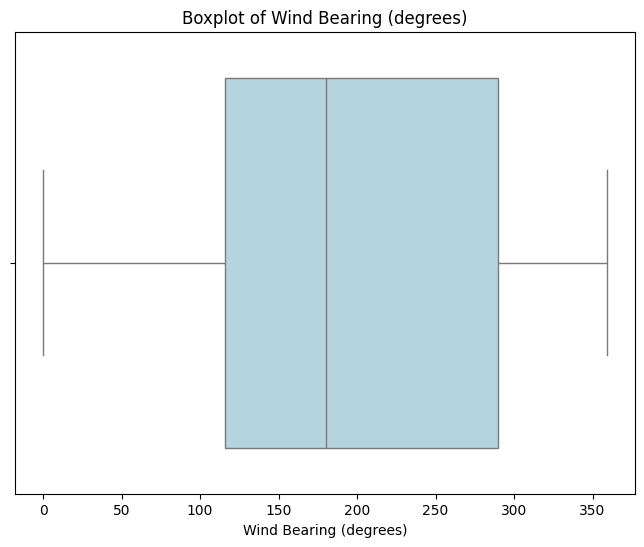

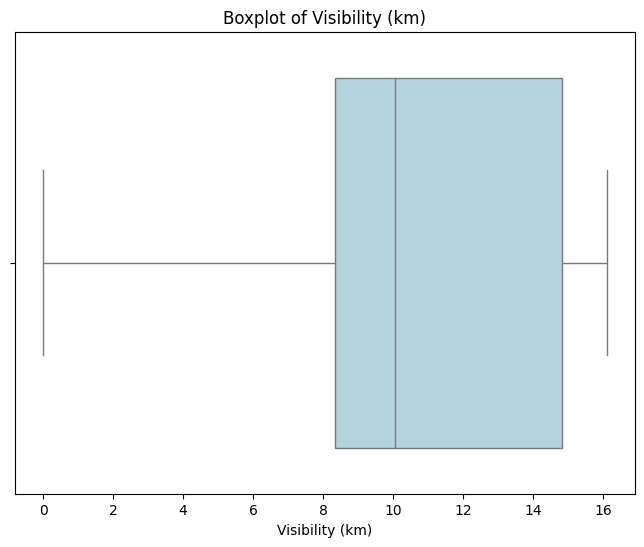

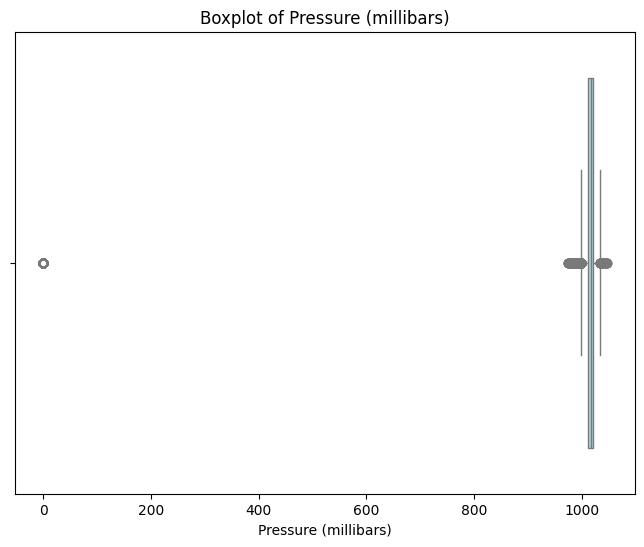

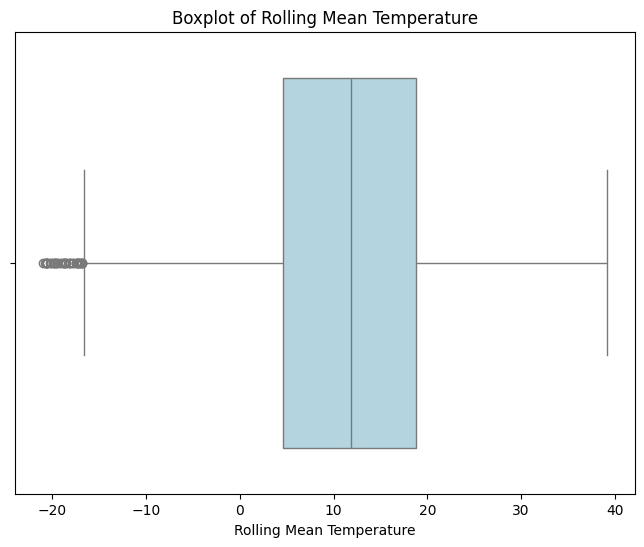

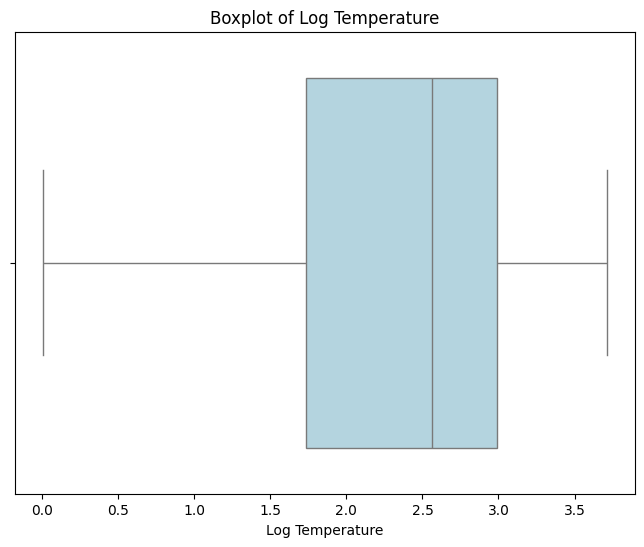

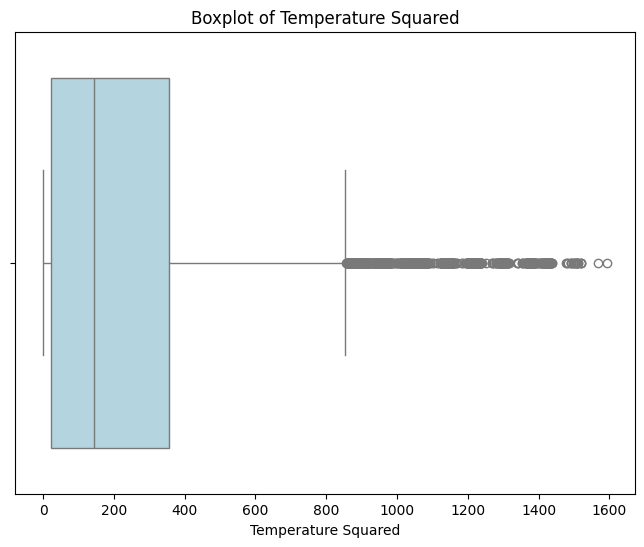

In [28]:
# Boxplot of numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

/Users/acer1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


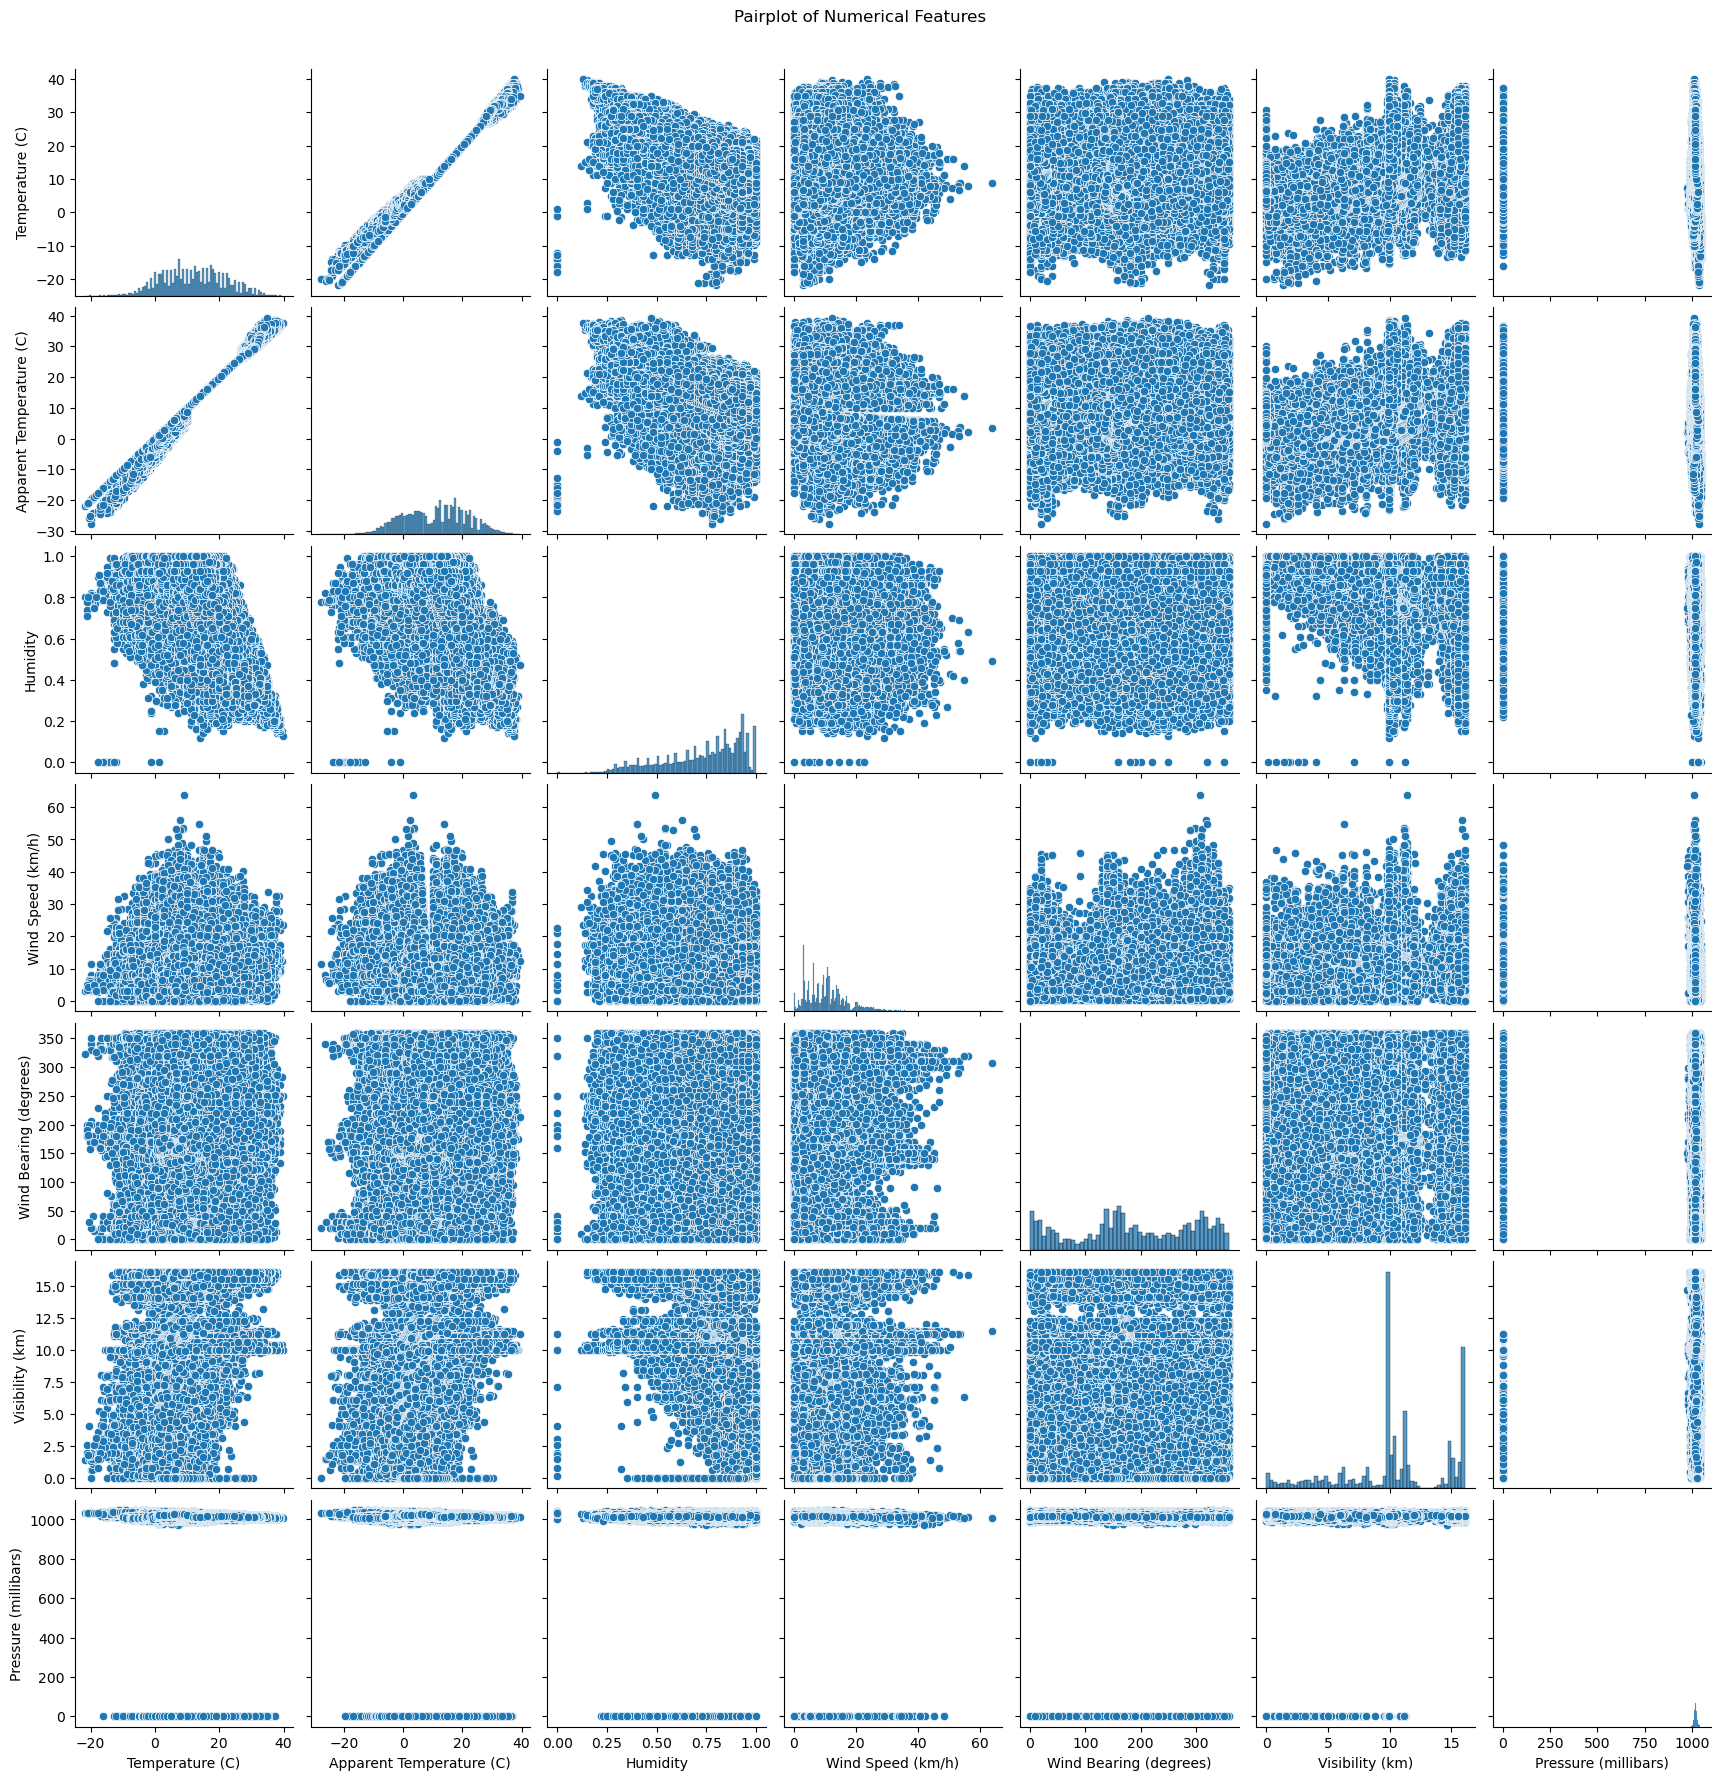

In [19]:
# Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

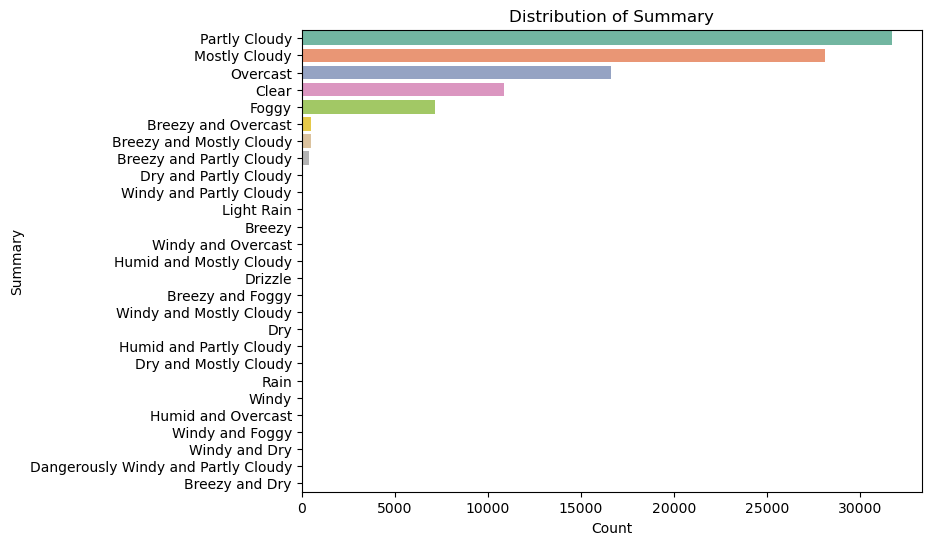

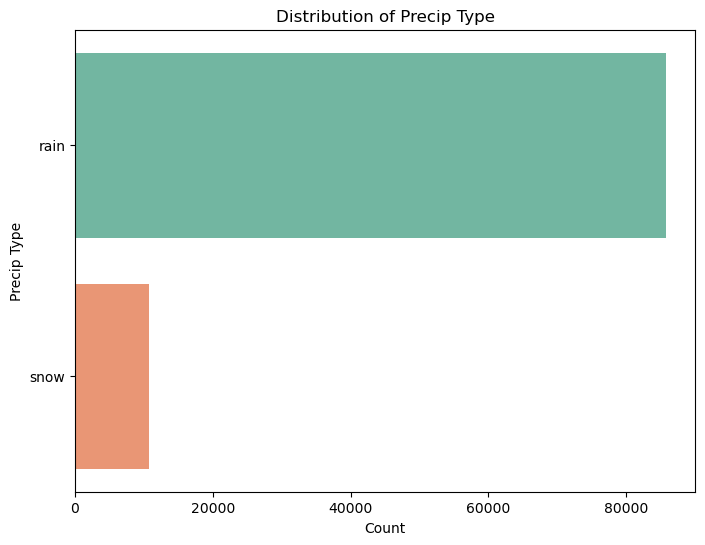

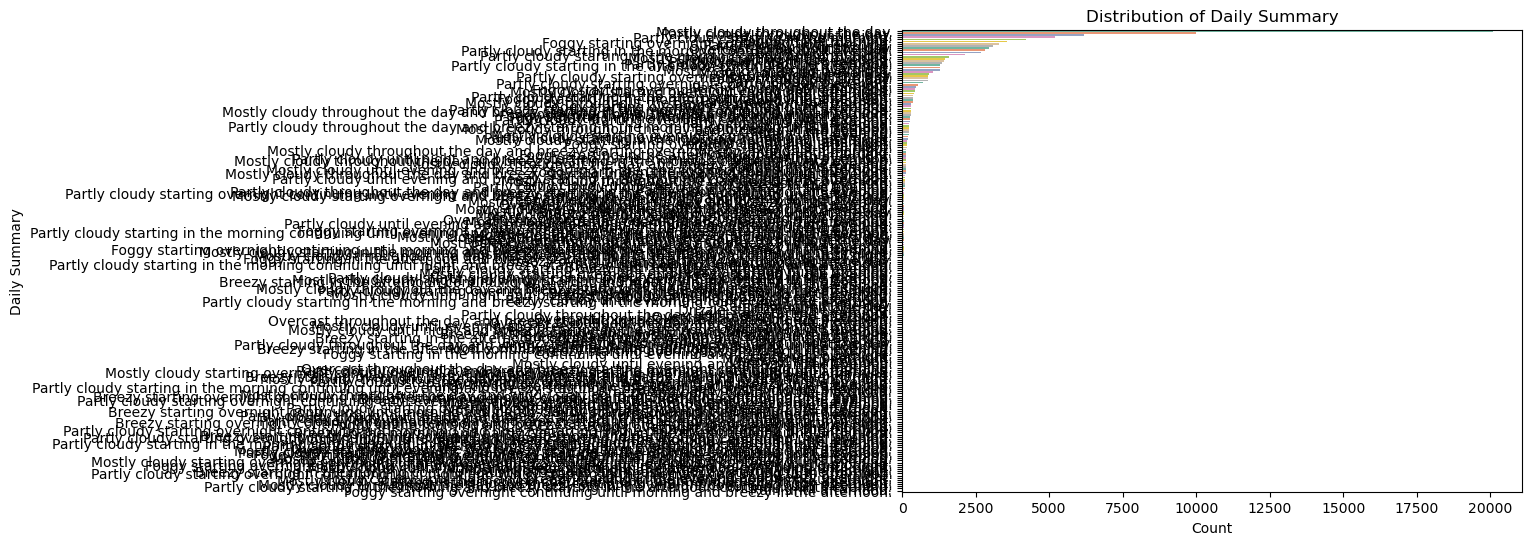

In [20]:
# Distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=df, palette='Set2', order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()